In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [308]:
data2015 = pd.read_csv('статистика/2015.csv')
data2019 = pd.read_csv('статистика/2019.csv')

In [309]:
names2015={'Country':'Страна', 
       'Region':'Регион', 
       'Happiness Rank':'Рейтинг счастья', 
       'Happiness Score':'Степень счастья', 
       'Standard Error':'Стандартная ошибка', 
       'Economy (GDP per Capita)':'ВВП на душу населения', 
       'Family':'Поддержка семей', 
       'Health (Life Expectancy)':'Здравоохранение', 
       'Freedom':'Свобода слова и выбора', 
       'Trust (Government Corruption)':'Доверие государственным институтам', 
       'Generosity':'Щедрость', 
       'Dystopia Residual':'Показатель антиутопии'}

data2015.rename(columns=names2015, inplace=True)

In [310]:
names2019={
    'Overall rank': 'Рейтинг счастья',
    'Country or region': 'Страна',
    'Score': 'Степень счастья',
    'GDP per capita': 'ВВП на душу населения',
    'Social support': 'Поддержка семей',
    'Healthy life expectancy': 'Здравоохранение',
    'Freedom to make life choices': 'Свобода слова и выбора',
    'Generosity': 'Щедрость',
    'Perceptions of corruption': 'Доверие государственным институтам'
}

data2019.rename(columns=names2019, inplace=True)

# Распределение степени счастья в мире

## 2015

синий: 2015 год
красный: 2019 год


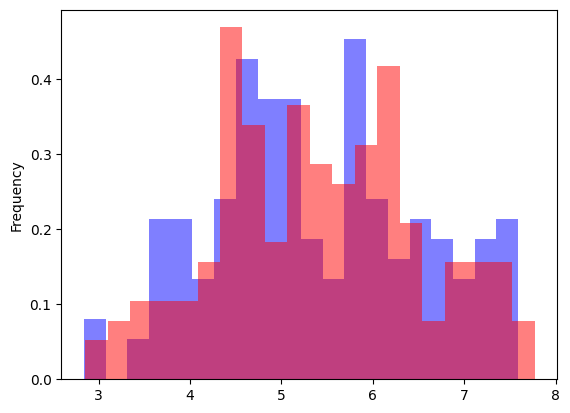

In [311]:
data2015['Степень счастья'].plot(kind='hist', 
                                 alpha = 0.5,
                                 bins=20,
                                 density = True,
                                color='blue')

data2019['Степень счастья'].plot(kind='hist', 
                                 alpha = 0.5,
                                 bins=20,
                                 density = True,
                                color='red')
print('синий: 2015 год')
print('красный: 2019 год')

за 5 лет увеличилось количество стран со средним уровнем счастья, уменьшилось количество с высоким уровнем, и увеличилось количество с низким

<AxesSubplot: title={'center': 'Зависимость между продажами и оценками пользователей'}, xlabel='Рейтинг счастья', ylabel='Доверие государственным институтам'>

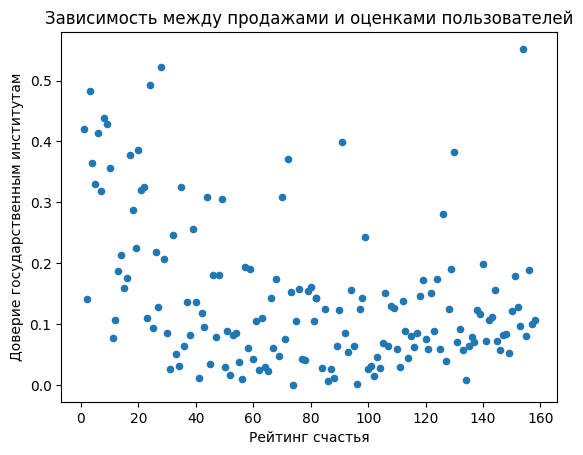

In [318]:
data = data2015[['Рейтинг счастья', 'Доверие государственным институтам']]
data.plot(kind='scatter', 
        x='Рейтинг счастья', 
        y='Доверие государственным институтам', 
        title='Зависимость между Рейтингом и доверием к органам власти')


<AxesSubplot: title={'center': 'Распределение Доверия государственным институтам'}>

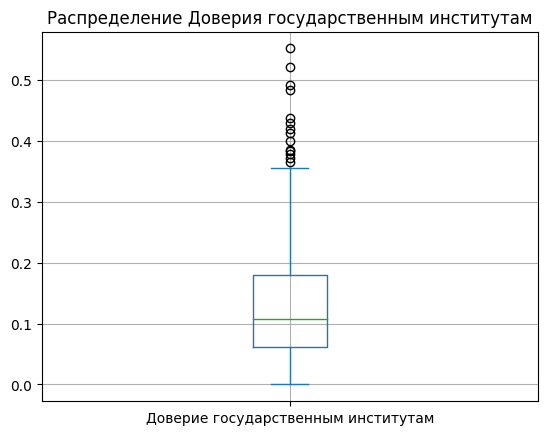

In [319]:
data['Доверие государственным институтам'].plot(kind='box',
                   title='Распределение Доверия государственным институтам', grid=True)

# Описание анализа

В приведенных датафреймах показан расчет рейтинга счастья стран в мире.  
В 2015 году приняло участие 158 стран. Рейтинг рассчитывался на основе ряда показателей, которые так или иначе влияют на ощущение счастья в стране.  
В 2019 году приняло участие 156 стран. Рейтинг рассчитывался также на ряде показателей, но некоторые из них были изменены.  

Все показатели далее складываются, соответственно, чем выше показатель, тем лучше.  
Для сравнения были выбраны две страны: лидер 2015 года - Швейцария (Switzerland), аутсайдер 2015 года - Того (Togo). 

## Швейцария

In [286]:
Switzerland2015 = data2015[data2015['Страна'] == 'Switzerland']
Switzerland2019 = data2019[data2019['Страна'] == 'Switzerland']

Switzerland2015 = Switzerland2015[['Страна', 'Степень счастья', 'Рейтинг счастья', 'ВВП на душу населения', 'Поддержка семей', 'Здравоохранение', 'Щедрость', 'Доверие государственным институтам', 'Свобода слова и выбора']]
Switzerland2015['Страна'] = 'Швейцария 2015'
Switzerland2015['Показатель антиутопии'] = 2.51738

Switzerland2019 = Switzerland2019.reindex(columns=['Страна', 'Степень счастья', 'Рейтинг счастья', 'ВВП на душу населения', 'Поддержка семей', 'Здравоохранение', 'Щедрость', 'Доверие государственным институтам', 'Свобода слова и выбора'])
Switzerland2019['Страна'] = 'Швейцария 2019'
Switzerland2019['Показатель антиутопии'] = 2.272

Switzerland = Switzerland2015.merge(Switzerland2019, how='outer')
Switzerland

,Страна,Степень счастья,Рейтинг счастья,ВВП на душу населения,Поддержка семей,Здравоохранение,Щедрость,Доверие государственным институтам,Свобода слова и выбора,Показатель антиутопии
0,Швейцария 2015,7.587,1,1.39651,1.34951,0.94143,0.29678,0.41978,0.66557,2.51738
1,Швейцария 2019,7.480,6,1.45200,1.52600,1.05200,0.26300,0.34300,0.57200,2.27200


синий: ВВП на душу населения
оранжевый: Поддержка семей
зеленый: Здравоохранение
красный: Щедрость
фиолетовый: Доверие государственным институтам
коричневый: Свобода слова и выбора
розовый: Показатель антиутопии
0: Швейцария 2015
1: Швейцария 2019


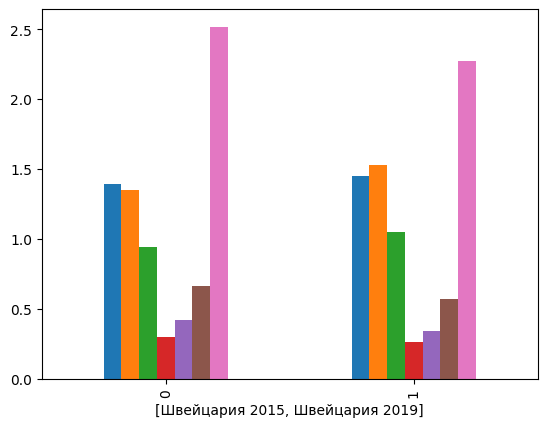

In [287]:
columns_to = ['ВВП на душу населения', 'Поддержка семей', 'Здравоохранение', 'Щедрость', 'Доверие государственным институтам', 'Свобода слова и выбора', 'Показатель антиутопии']
Switzerland[columns_to].plot(kind='bar',
                            legend=False,
                            xlabel = Switzerland['Страна'])

legend = {'синий': 'ВВП на душу населения', 
          'оранжевый': 'Поддержка семей', 
          'зеленый': 'Здравоохранение', 
          'красный': 'Щедрость', 
          'фиолетовый': 'Доверие государственным институтам',
          'коричневый': 'Свобода слова и выбора',
          'розовый': 'Показатель антиутопии',
          '0': 'Швейцария 2015',
          '1': 'Швейцария 2019'
         }
for key, value in legend.items():
    print(f'{key}: {value}')

<AxesSubplot: ylabel='value'>

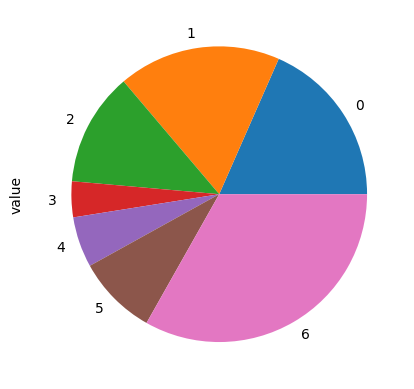

In [299]:
Switzerland_pie = pd.melt(Switzerland2015, id_vars='Страна', value_vars=['ВВП на душу населения', 'Поддержка семей', 'Здравоохранение', 'Щедрость', 'Доверие государственным институтам', 'Свобода слова и выбора', 'Показатель антиутопии'])
Switzerland_pie.drop(columns=Switzerland_pie.columns[0], axis=1, inplace=True)
Switzerland_pie.set_index('variable')
Switzerland_pie['value'].plot(kind='pie')

# Итог

За 5 лет Швейцария с 1 места спустилась на 6.  
В целом показатели счастья, которые измерялись, подобны друг другу, то есть не сильно поменялись.  
Стоит также отметить факт, что пропущенные данные за 2019 (вынесенные в иное) все же ниже по сравнению с 2015 годом.  


## Того

In [230]:
Togo2015 = data2015[data2015['Страна'] == 'Togo']
Togo2019 = data2019[data2019['Страна'] == 'Togo']

Togo2015 = Togo2015[['Страна', 'Степень счастья', 'Рейтинг счастья', 'ВВП на душу населения', 'Поддержка семей', 'Здравоохранение', 'Щедрость', 'Доверие государственным институтам', 'Свобода слова и выбора']]
Togo2015['Страна'] = 'Того 2015'
Togo2015['Показатель антиутопии'] = 1.56726

Togo2019 = Togo2019[['Страна', 'Степень счастья', 'Рейтинг счастья', 'ВВП на душу населения', 'Поддержка семей', 'Здравоохранение', 'Щедрость', 'Доверие государственным институтам', 'Свобода слова и выбора']]
Togo2019['Страна'] = 'Того 2015'
Togo2019['Показатель антиутопии'] = 2.273

Togo = Togo2015.merge(Togo2019, how='outer')
Togo

,Страна,Степень счастья,Рейтинг счастья,ВВП на душу населения,Поддержка семей,Здравоохранение,Щедрость,Доверие государственным институтам,Свобода слова и выбора,Показатель антиутопии
0,Того 2015,2.839,158,0.20868,0.13995,0.28443,0.16681,0.10731,0.36453,1.56726
1,Того 2015,4.085,139,0.27500,0.57200,0.41000,0.17700,0.08500,0.29300,2.27300


синий: ВВП на душу населения
оранжевый: Поддержка семей
зеленый: Здравоохранение
красный: Щедрость
фиолетовый: Доверие государственным институтам
коричневый: Свобода слова и выбора
розовый: Показатель антиутопии
0: Швейцария 2015
1: Швейцария 2019


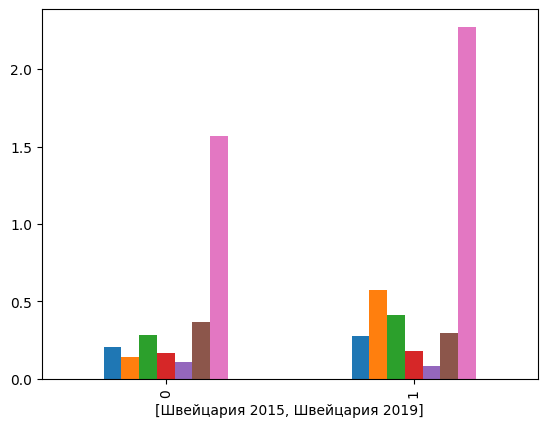

In [219]:
columns_to = ['ВВП на душу населения', 'Поддержка семей', 'Здравоохранение', 'Щедрость', 'Доверие государственным институтам', 'Свобода слова и выбора', 'Показатель антиутопии']
Togo[columns_to].plot(kind='bar',
                            legend=False,
                            xlabel = Switzerland['Страна'])

legend = {'синий': 'ВВП на душу населения', 
          'оранжевый': 'Поддержка семей', 
          'зеленый': 'Здравоохранение', 
          'красный': 'Щедрость', 
          'фиолетовый': 'Доверие государственным институтам',
          'коричневый': 'Свобода слова и выбора',
          'розовый': 'Показатель антиутопии',
          '0': 'Швейцария 2015',
          '1': 'Швейцария 2019'
         }
for key, value in legend.items():
    print(f'{key}: {value}')

# Итог

за 5 лет Того поднялся с 158 на 139 место за счет повышения показателей: ВВП на душу населения, поддержка семей и здравоохранение. Также стоит отметить рост показателя антиутопии.